In [1]:
import numpy as np 
# import matplotlib.pyplot as plt 

# **Testing reduction**

In [2]:
Size  = 20
Matrix_B =np.random.permutation(Size*Size).reshape((Size,Size))

In [3]:
Matrix_B

array([[388, 213, 102, 211, 169,  80, 333,  55, 217, 165, 284, 164, 195,
        330, 253, 304, 328, 107, 140,  63],
       [137, 271,  49, 224, 171, 269, 384,  85, 237, 316, 175, 136,   0,
        372, 250,  32, 268,  47, 307,   5],
       [ 28, 144,  62, 266,  46, 367, 139, 399, 129,  57, 363, 364,  87,
         16, 215, 320, 391, 172, 185, 111],
       [  2, 342, 229, 208, 225, 389,  79,  21, 128,  33,  31,  38, 252,
        354, 392, 251, 159, 153, 275,  66],
       [368, 132, 115, 298, 150, 338, 212, 204, 100,  27,  98,  61,  43,
        149, 255,  15, 288,  84,  40, 176],
       [240,  17,  90,  19, 118, 360, 197,  52,  51, 272, 394,  39, 104,
        311, 188,  65, 170,  23,   9, 101],
       [103,  95, 294, 201, 162, 359, 267, 377, 180, 383, 141, 289,  72,
        336, 203, 190, 143, 344, 121,  99],
       [ 86, 148, 256,  74,  71, 396, 214,  36, 260, 236, 163,  75, 302,
        221,  13, 303, 295, 352, 322,  29],
       [161,  14,   6, 248, 349, 378, 319, 317, 347,  30,  10, 1

In [4]:
B = np.array([Matrix_B[i,j] for i in range(Size) for j in range(Size) ])

In [5]:
# B 

In [6]:
B_perm = np.array([Matrix_B[i,j] for j in range(Size) for i in range(Size) ])

In [7]:
# B_perm

In [8]:
Somme_1  = sum([Matrix_B[i,j]*Matrix_B[i,k] for k in range(Size) for j in range(Size) for i in range(Size) if j!=k])

In [9]:
Somme_1

302064404

In [10]:
Somme_2  = sum([Matrix_B[i,j]*Matrix_B[k,j] for k in range(Size) for j in range(Size) for i in range(Size) if i!=k])
Somme_2

305790990

In [11]:
Somme_3 = sum([(sum( Matrix_B[i,j] for j in range(Size))-sum(Matrix_B[j,i]for j in range(Size)))**2 for i in range(Size)])
Somme_3

13521758

In [12]:
D = np.sum(Matrix_B,axis = 1)- np.sum(Matrix_B,axis = 0)
D.T@D

13521758

In [13]:
S = 0
for i in range(len(Matrix_B)): 
    S1 = sum(Matrix_B[i,:])
    S2 = sum(Matrix_B[:,i])
    S+= (S1-S2)**2

In [14]:
S 

13521758

In [15]:
Somme_3_ = D.T @ D

In [16]:
Somme_4 = sum([Matrix_B[i,j]*Matrix_B[j,i] for i in range(Size) for j in range(Size)])
Somme_4

15804431

In [17]:
Somme_4_ = np.sum(Matrix_B*Matrix_B.T)

In [18]:
Somme_4_

15804431

# Création des matrices C et P 

In [19]:
def rotation_lignes(Matrix,n): 
    
    for _ in range(n):
        Ligne_0 = Matrix[0,:].copy()
        for i in range(len(Matrix)- 1): 
            Matrix[i,:] = Matrix[i+1,:]

        Matrix[-1,:] = Ligne_0

    return Matrix

In [20]:
rotation_lignes(np.eye(4),3)

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [21]:
# c = np.kron(np.eye(Size), c_n)


In [22]:
# c

In [23]:
def C(Size): 
    
    c_n = np.zeros((Size,Size))
    for i in range(Size-1): 
        c_n+=rotation_lignes(np.eye(Size),i+1)

    c = np.kron(np.eye(Size), c_n)

    return c 

In [24]:
C(Size)

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [25]:
S1 = B.T @ C(Size) @B 

In [26]:
S1- Somme_1

0.0

In [27]:
def permutation_matrix(X, f_X):
    n = len(X)
    P = np.zeros((n, n), dtype=int)  # Créer une matrice remplie de zéros de taille nxn

    # Remplir la matrice de permutation
    for i in range(n):
        index = np.where(f_X==X[i])[0][0]
        P[index][i] = 1

    return P

In [28]:
P= permutation_matrix(B,B_perm)

In [29]:
P @ B == B_perm

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [30]:
S2 =  B.T @ P.T @ C(Size) @ P @ B

In [31]:
S2 - Somme_2

0.0

In [32]:
S4 = B.T @ P @ B 

In [33]:
S4 - Somme_4

0

**Somme1, Somme2, somme4 Vérifiées**

In [34]:
# Somme_3_1 = np.sum(Matrix_B,axis = 1).T @ np.sum(Matrix_B,axis = 1)
Somme_3_1 = sum([sum(Matrix_B[i,:])**2 for i in range(Size)])

In [35]:
Somme_3_1

323317804

In [36]:
B.T @ C(Size) @ B + B.T @ B 

323317804.0

In [37]:
Somme_3_2 = np.sum(Matrix_B,axis = 0).T @ np.sum(Matrix_B,axis = 0)


In [38]:
Somme_3_2

327044390

In [39]:
B.T @P@ C(Size)@ P@ B + B.T @ B 

327044390.0

In [40]:
Somme_3_3 = sum(sum(Matrix_B[i,:])*sum(Matrix_B[:,i]) for i in range(Size))
Somme_3_3

318420218

Somme_3_3 = somme_4 + whats below 

In [41]:
sum([Matrix_B[i,j]*Matrix_B[k,i] for i in range(Size) for j in range(Size) for k in range(Size)if j!=k])

302615787

In [42]:
B.T@C(Size)@P@B 

302615787.0

In [43]:
S3 = B.T @ C(Size) @ B + 2*B.T @ B +B.T @P@ C(Size)@ P@ B - 2*( B.T@C(Size)@P@B + B.T@P@B)
 

In [44]:
S3-Somme_3

0.0

# **Reduction au propre**

In [45]:
# Size = 3

In [46]:
def permutation_matrix(Size):
    M =np.random.permutation(Size*Size).reshape((Size,Size))
    X = np.array([M[i,j] for i in range(Size) for j in range(Size) ])
    f_X = np.array([M[i,j] for j in range(Size) for i in range(Size) ])
    n = len(X)
    P = np.zeros((n, n), dtype=int)  
    for i in range(n):
        index = np.where(f_X==X[i])[0][0]
        P[index][i] = 1

    return P

In [47]:
permutation_matrix(3).T == permutation_matrix(3)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True]])

In [48]:
P_test = permutation_matrix(Size)

In [49]:
def C_rotation(Size): 
    
    c_n = np.zeros((Size,Size))
    for i in range(Size-1): 
        c_n+=rotation_lignes(np.eye(Size),i+1)

    c = np.kron(np.eye(Size), c_n)

    return c 

In [50]:
C_test = C_rotation(Size)

In [51]:
# J_test = ( C+ P_test.T@C_test@P_test +P_test ) + (C_test+ P_test.T@C_test@P_test + 2*np.eye(Size*Size)-2*(C_test@P_test + P_test))

In [52]:
# B.T @ J_test @B - (Somme_4+Somme_3+Somme_2+Somme_1)

In [53]:
import itertools

# Matrice des taux de change
taux_de_change = [
    [1.0, 0.8, 0.6, 110, 0.7, 1.2],  # USD
    [1.25, 1.0, 0.75, 130, 0.9, 1.5], # EUR
    [1.6, 1.33, 1.0, 180, 1.2, 2.0],  # GBP
    [0.009, 0.0077, 0.0055, 1.0, 0.0068, 0.011], # JPY
    [1.43, 1.11, 0.83, 155, 1.0, 1.67], # AUD
    [0.83, 0.67, 0.5, 91, 0.6, 1.0] ]

devises = ['USD', 'EUR', 'GBP', 'JPY', 'AUD', 'CAD']

# Fonction pour trouver le cycle d'arbitrage avec le profit maximal
def trouver_cycle_max_profit(taux_de_change):
    n = len(taux_de_change)
    cycle_optimal = None
    profit_optimal = 1
    
    # Générer toutes les combinaisons possibles des devises
    for r in range(2, n+1):  # Tailles différentes de combinaisons
        permutations = itertools.permutations(range(n), r)
    
        for perm in permutations:
            cycle = list(perm)
            profit = 1
            
            # Calculer le profit du cycle
            for i in range(r):  # Utiliser la taille de la combinaison actuelle
                profit *= taux_de_change[cycle[i]][cycle[(i+1) % r]]
            
            # Mettre à jour le cycle optimal si le profit est plus grand
            if profit > profit_optimal:
                cycle_optimal = cycle
                profit_optimal = profit
    
    return cycle_optimal, profit_optimal

# Trouver le cycle d'arbitrage avec le profit maximal
cycle_optimal, profit_optimal = trouver_cycle_max_profit(taux_de_change)

# Afficher le cycle optimal
if cycle_optimal:
    print("Cycle d'arbitrage optimal :", [devises[i] for i in cycle_optimal])
    print("Profit associé au cycle optimal :", profit_optimal)
else:
    print("Aucun cycle d'arbitrage trouvé.")


Cycle d'arbitrage optimal : ['EUR', 'AUD', 'USD', 'JPY']
Profit associé au cycle optimal : 1.090089


In [54]:
log_vectorized = np.vectorize(np.log)
log_Taux = log_vectorized(taux_de_change)
# log_Taux

In [55]:
Size = len(log_Taux)

In [56]:
H_1= -np.array([log_Taux[i,j] for i in range(len(log_Taux)) for j in range(len(log_Taux[0]))])

In [57]:
H_1 

array([-0.        ,  0.22314355,  0.51082562, -4.70048037,  0.35667494,
       -0.18232156, -0.22314355, -0.        ,  0.28768207, -4.86753445,
        0.10536052, -0.40546511, -0.47000363, -0.28517894, -0.        ,
       -5.19295685, -0.18232156, -0.69314718,  4.7105307 ,  4.86653495,
        5.20300719, -0.        ,  4.99083267,  4.50986001, -0.35767444,
       -0.10436002,  0.18632958, -5.04342512, -0.        , -0.51282363,
        0.18632958,  0.40047757,  0.69314718, -4.51085951,  0.51082562,
       -0.        ])

In [58]:
P = permutation_matrix(Size)

In [59]:
C = C_rotation(Size)


In [60]:
np.linalg.norm(P@C-C@P)

18.973665961010276

In [61]:
M1 = 1
M2  =10

In [62]:
A = C@P
A1 = (A+A.T)/2
A2 = (A - A.T)/2

In [63]:
J_1 = ( C+ P.T@C@P +P ) + (C+ P.T@C@P +2*np.eye(Size*Size )-2*( + P))
J_1

array([[1., 2., 2., ..., 0., 0., 0.],
       [2., 2., 2., ..., 0., 0., 0.],
       [2., 2., 2., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 2., 2., 2.],
       [0., 0., 0., ..., 2., 2., 2.],
       [0., 0., 0., ..., 2., 2., 1.]])

In [64]:
I = np.ones(len(H_1))

In [65]:
H = H_1/2 + M1*(J_1.T+J_1)@I /4
H

array([10.5       , 10.61157178, 10.75541281,  8.14975982, 10.67833747,
       10.40883922, 10.38842822, 10.5       , 10.64384104,  8.06623277,
       10.55268026, 10.29726745, 10.26499819, 10.35741053, 10.5       ,
        7.90352157, 10.40883922, 10.15342641, 12.85526535, 12.93326748,
       13.10150359, 10.5       , 12.99541633, 12.75493   , 10.32116278,
       10.44781999, 10.59316479,  7.97828744, 10.5       , 10.24358819,
       10.59316479, 10.70023878, 10.84657359,  8.24457025, 10.75541281,
       10.5       ])

In [66]:
J = -M1*J_1/2

In [67]:
# K = ((J+J.T)/2)
K = J.copy()
np.fill_diagonal(K,0)
K

array([[ 0., -1., -1., ..., -0., -0., -0.],
       [-1.,  0., -1., ..., -0., -0., -0.],
       [-1., -1.,  0., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ...,  0., -1., -1.],
       [-0., -0., -0., ..., -1.,  0., -1.],
       [-0., -0., -0., ..., -1., -1.,  0.]])

In [68]:
J_sym = (J+J.T)/2

In [69]:
import numpy as np 

In [70]:
J_compact = np.zeros((Size+1,Size+1))
J_compact[:Size,:Size] = J_sym
J_compact[:Size,Size] = H 
J_compact[Size,:Size] = H


ValueError: could not broadcast input array from shape (36,36) into shape (6,6)

In [ ]:
from SBM import SBM
from simulation_manager import SimulationManager
import results_annalysis

In [ ]:
eigs = np.linalg.eigvals(J)
norm_eigs = np.abs(eigs)
ksi = 1/(norm_eigs.max())
ksi


0.09523809523809523

In [ ]:
p_first = 1-ksi*np.real(eigs.max())
p_last = 1-ksi*np.real(eigs.min())

In [ ]:
np.shape(H)

(36,)

In [ ]:
np.shape(J)

(36, 36)

In [ ]:
step_size = 0.01
num_iterations= 2000
num_simulations= 50
lag = 0

def pumping_rate(self, t):
    # return t/10
    if t<lag:
        return 0
    else:
        return 1 * p_last * (t-lag)/(num_iterations-lag)


In [ ]:
manager = SimulationManager(step_size=0.1, num_iterations=num_iterations, num_simulations=2, J=J, H=H, pumping_rate=pumping_rate, stopping_criterion=0.1, save_states_history=True, save_energies_history=True, n_threads=2, savetofile=False)

In [ ]:
states, energies, last_states, last_TAC_states, last_sign_States, last_energies, last_TAC_energies, last_sign_energies, final_times, sign_times, TAC_times = manager.run_simulation()

In [ ]:
# forces = -np.dot(J, positions.T).T * ksi + H


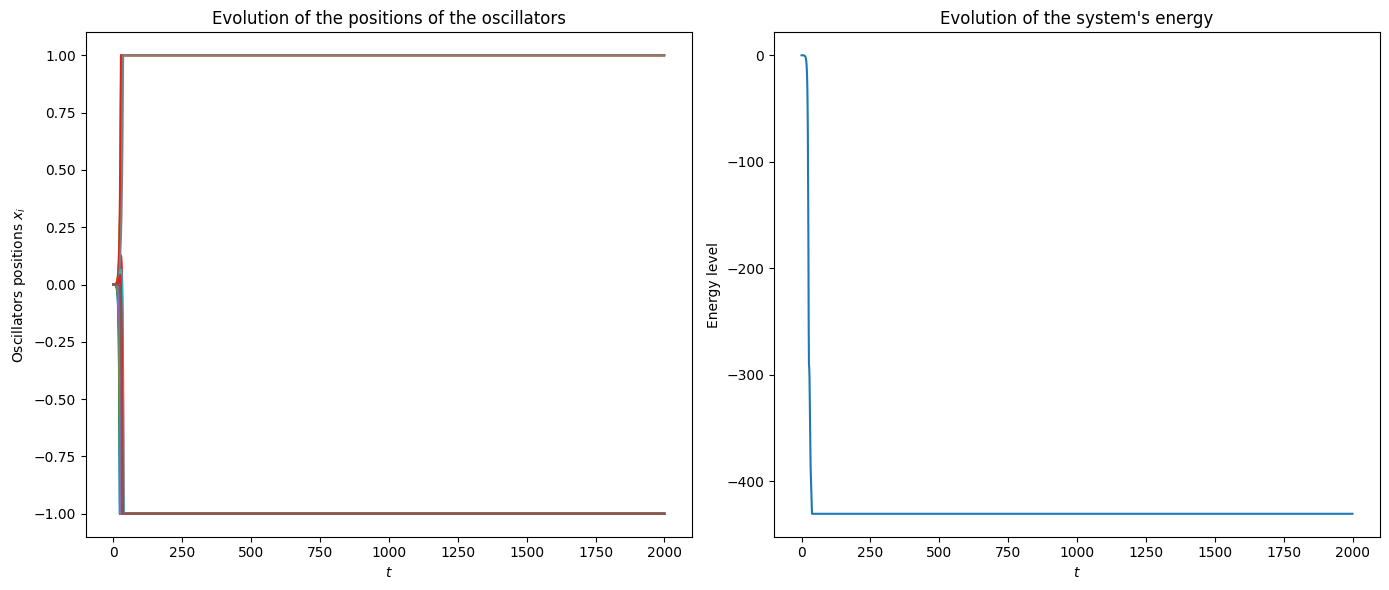

In [ ]:
results_annalysis.complete_plot(states, energies, 0)

In [ ]:
solution = np.sign(last_states[0, :, 0])
solution

array([-1., -1., -1., -1., -1., -1.,  1., -1., -1.,  1., -1.,  1., -1.,
       -1., -1., -1., -1., -1.,  1., -1., -1.,  1., -1.,  1., -1., -1.,
       -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.])

# Vérification des contraintes 

In [ ]:
# solution.T@(C+P.T@C@P+2*np.eye(Size*Size)-2*(C@P + P))@solution

In [ ]:
# solution.T @( C+ P.T@C@P +P )@solution

In [ ]:
H_1

array([-0.        ,  0.22314355,  0.51082562, -4.70048037,  0.35667494,
       -0.18232156, -0.22314355, -0.        ,  0.28768207, -4.86753445,
        0.10536052, -0.40546511, -0.47000363, -0.28517894, -0.        ,
       -5.19295685, -0.18232156, -0.69314718,  4.7105307 ,  4.86653495,
        5.20300719, -0.        ,  4.99083267,  4.50986001, -0.35767444,
       -0.10436002,  0.18632958, -5.04342512, -0.        , -0.51282363,
        0.18632958,  0.40047757,  0.69314718, -4.51085951,  0.51082562,
       -0.        ])

In [ ]:
Gain =(H_1 @ (solution + I))/2
Gain

-1.3191775189675194

In [ ]:
SS =(solution+I).reshape((6,6))/2
SS

array([[0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [ ]:
import numpy as np

# This fucntion takes the solution X (decision VECTOR) and the exchange rate matrix. It raises an error if the solution is invalid
def check_valid_solution(X, exchange_rate_matrix):
    # number of nodes
    V = len(exchange_rate_matrix)
    # number of edges (pairs tradable)
    E = len(exchange_rate_matrix[~np.isnan(exchange_rate_matrix)])

    # First check: the right size
    if len(X) != V**2:
        raise ValueError(f"Decison vector does not have the right shape: lengh of {len(X)} and should be {V**2}")

    # Match the shape of X with the exchange rate matrix
    X = X.reshape(V, V)

    # Second check: first condition
    for i in range(V):
        sum1, sum2 = 0, 0
        for j in range(V):
            if X[i,j] != 0:
                sum1 += X[i,j]
            if X[j,i] != 0:
                sum2 += X[j,i]
    
        if sum1 != sum2:
            raise ValueError(f"The trade sequence is not a circle. Increase coefficient lambda1 and retry")
    
    # Third check: second condition
    for i in range(V):
        sum = 0
        for j in range(V):
            if X[i, j] != 0:
                sum += X[i,j]
        if sum>1:
            raise ValueError(f"Traded the same asset twice. Increase coefficient lambda2 and retry")
    
    print("Solution is valid!")
    
    return

# This function takes the decision VECTOR and log exchange rates matrix and outputs the proffit the arbitrage would have made
def compute_theorical_proffit(X, log_echange_rate_matrix):
    n = len(log_echange_rate_matrix)
    X = X.reshape(n, n)
    
    indexes = np.where(X==1)

    # compute the sum of the logs of the exchange rates
    log_rates_sum = np.sum(log_echange_rate_matrix[X==1])

    return np.exp(log_rates_sum)

In [ ]:
import numpy as np
# Il ya quelque chose à vérifier !! on veut touver tous les cycles courtes ou longue 
def find_cycle_node(neighbors, node, visited):
    if node in visited:
        return visited

    visited.append(node)

    if node in neighbors:
        for neighbor in neighbors[node]:
            find_cycle_node(neighbors, neighbor, visited)

def split_cycles(solution):
    # Extract the chosen edges by the algorithm
    Chosen_edges = np.array([(i, j) for i in range(len(SS)) for j in range(len(SS)) if SS[i, j] == 1 and i != j])
    # Create a graph that corresponds to the edges chosen

    neighbors = {}
    for edge in Chosen_edges:
        if edge[0] not in neighbors:
            neighbors[edge[0]] = []
        neighbors[edge[0]].append(edge[1])

    Cycles = []

    for node in neighbors:
        visited = []
        find_cycle_node(neighbors, node, visited)
        if visited != [] and len(visited) > 1:
            Cycles.append(visited)

    return Cycles


In [ ]:
split_cycles(SS)

[[1, 0, 3, 5], [3, 0, 5], [4, 3, 0, 5]]

In [ ]:
def find_cycles(edges):
    # Créer un dictionnaire pour stocker les voisins de chaque nœud
    neighbors = {}
    for edge in edges:
        if edge[0] not in neighbors:
            neighbors[edge[0]] = []
        neighbors[edge[0]].append(edge[1])

    # Fonction récursive pour trouver les cycles à partir d'un nœud donné
    def find_cycles_from_node(node, path):
        cycles = []
        if node in path:
            start_index = path.index(node)
            cycle = path[start_index:]
            if len(cycle) > 1:
                cycles.append(cycle)
        else:
            path.append(node)
            if node in neighbors:
                for neighbor in neighbors[node]:
                    cycles.extend(find_cycles_from_node(neighbor, path.copy()))
            path.pop()
        return cycles

    # Rechercher des cycles à partir de chaque nœud
    all_cycles = []
    for node in neighbors.keys():
        cycles = find_cycles_from_node(node, [])
        all_cycles.extend(cycles)

    return all_cycles

# Exemple d'utilisation avec votre tableau
# edges = [(0, 5), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5)]
# cycles = find_cycles(edges)
# print("Cycles trouvés:")
# for cycle in cycles:
#     print(cycle)


In [ ]:
Cycle_optimal_sb = [(i,j) for i in range(len(SS)) for j in range(len(SS)) if SS[i,j]==1]
Cycle_optimal_sb

[(1, 0), (1, 3), (1, 5), (3, 0), (3, 3), (3, 5), (4, 3)]

In [ ]:
find_cycles(Cycle_optimal_sb)


[]